In [1]:
import pandas as pd

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)


In [8]:
%matplotlib inline

In [2]:
data = pd.read_csv('data/events.csv')

/home/july/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [12]:
data.event.value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [18]:
len(data.person.value_counts())

27624

In [22]:
check_convers = data[(data['event']=='checkout')|(data['event']=='conversion')]

In [23]:
check_convers.shape

(34907, 23)

In [25]:
check_convers.event.value_counts()

checkout      33735
conversion     1172
Name: event, dtype: int64

In [26]:
events_person = check_convers[['person','event']]

In [28]:
event_cant = events_person.groupby('person').apply(lambda x: x['event'].value_counts().reset_index(name='cantidad'))

In [29]:
event_cant.head(6)

,,index,cantidad
person,,,
0004b0a2,0,checkout,1
0006a21a,0,checkout,1
000a54b2,0,checkout,1
00184bf9,0,checkout,4
0019c395,0,checkout,1
001bb7eb,0,checkout,1


In [31]:
event_cant = event_cant.rename(columns={'index':'event'})
event_cant['person']= event_cant.index

In [ ]:
sns.swarmplot(x="event", y="cantidad", data=event_cant).set_title('cantidad de checkout y converse para los usuarios')

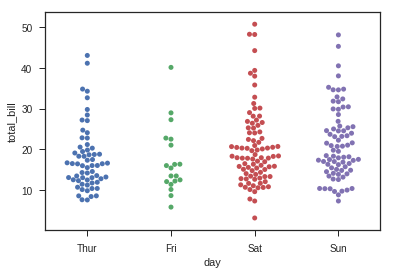

In [9]:
tips = sns.load_dataset("tips")
sns.swarmplot(x="day", y="total_bill", data=tips)

In [10]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
